In [196]:
# taken from https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python
%matplotlib inline
import io
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')

In [197]:
datafile_AMT = '../data/MTurk_anonymous.xlsx'
datafile_DTU1 = '../data/DTU1_anonymous.xlsx'
datafile_DTU2 = '../data/DTU2_anonymous.xlsx'

In [198]:
df_MTurk = pd.DataFrame(pd.read_excel(datafile_AMT))
df_MTurk.drop(df_MTurk.columns[df_MTurk.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df_DTU1 = pd.DataFrame(pd.read_excel(datafile_DTU1))
df_DTU1.drop(df_DTU1.columns[df_DTU1.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df_DTU2 = pd.DataFrame(pd.read_excel(datafile_DTU2))
df_DTU2.drop(df_DTU2.columns[df_DTU2.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [199]:
df_MTurk.head()

,session,code,group,id_in_group,round,arrival,choice,certainty,bonus,strategy,simple,cutoff,fault,payoff
0,0c0pdasz,zh74wr23,2,1,1,8.2,1,0.875,-0.13,NaN,NaN,NaN,NaN,7.89
1,0c0pdasz,w73mxa5y,2,2,1,8.3,1,0.875,-0.13,NaN,NaN,NaN,NaN,4.66
2,0c0pdasz,zh74wr23,2,1,2,8.2,0,0.500,-1.39,NaN,NaN,NaN,NaN,7.89
3,0c0pdasz,w73mxa5y,2,2,2,8.1,1,0.875,-4.16,NaN,NaN,NaN,NaN,4.66
4,0c0pdasz,zh74wr23,2,1,3,8.2,1,0.990,-0.01,NaN,NaN,NaN,NaN,7.89


In [200]:
# split dataset in features and target variable
# feature_cols = ['round', 'arrival']
feature_cols = ['group', 'id_in_group', 'round','arrival']
X = df_DTU1[feature_cols] # Features, independent variables
y = df_DTU1.choice # Target variable, dependent variable

In [201]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [202]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

#
y_pred = logreg.predict(X_test)

In [203]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 93,  56],
       [  2, 389]], dtype=int64)

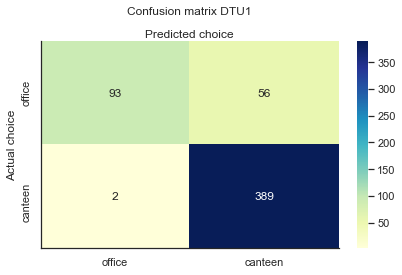

In [204]:
# visualization
fig, ax = plt.subplots()

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix DTU1', y=1.1)
plt.ylabel('Actual choice')
plt.xlabel('Predicted choice')

# plotting paraphernalia
class_names=['office', 'canteen'] # name  of classes
tick_marks = [.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks([.4,1.4], class_names)
plt.tight_layout()

plt.rcParams["font.family"] = "sans-serif"
PLOTS_DIR = '../plots'

if not os.path.exists(PLOTS_DIR):
    os.makedirs(PLOTS_DIR)

plt.savefig(os.path.join(PLOTS_DIR, 'confusion_DTU1.png'),
            bbox_inches='tight', transparent=True, dpi=300)
plt.savefig(os.path.join(PLOTS_DIR, 'confusion_DTU1.pdf'), transparent=True, dpi=300)
sns.despine()

In [205]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8925925925925926
Precision: 0.8741573033707866
Recall: 0.9948849104859335


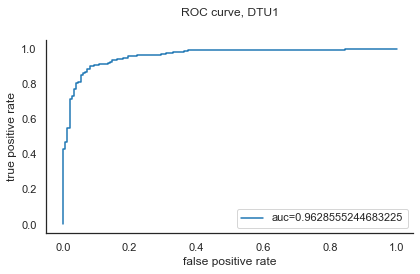

In [206]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve, DTU1', y=1.1)
plt.tight_layout()

plt.rcParams["font.family"] = "sans-serif"
PLOTS_DIR = '../plots'

if not os.path.exists(PLOTS_DIR):
    os.makedirs(PLOTS_DIR)

plt.savefig(os.path.join(PLOTS_DIR, 'ROC_DTU1.png'),
            bbox_inches='tight', transparent=True, dpi=300)
plt.savefig(os.path.join(PLOTS_DIR, 'ROC_DTU1.pdf'), transparent=True, dpi=300)
sns.despine()

In [207]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.62      0.76       149
           1       0.87      0.99      0.93       391

    accuracy                           0.89       540
   macro avg       0.93      0.81      0.85       540
weighted avg       0.90      0.89      0.88       540



In [208]:
# obtaing model deviance
def deviance(X, y, logreg):
    return 2*metrics.log_loss(y, logreg.predict_proba(X), normalize=False)
deviance(X, y, logreg)

1092.3564737091044

In [209]:
print(X_test) # test data set
print(y_pred)

      group  id_in_group  round  arrival
175       4            2     28      8.0
264       6            1     13      8.5
2131     57            2     16      8.5
379       8            2     12      8.0
317       7            2      9      8.5
...     ...          ...    ...      ...
810      18            1      3      8.3
522      11            1     24      9.0
311       7            2      6      8.5
1851     41            2      4      8.1
1642     35            1     20      8.4

[540 rows x 4 columns]
[1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1
 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0

In [210]:
df = X_test.join(df_DTU1.choice, how='left')
df['prediction'] = y_pred
df

,group,id_in_group,round,arrival,choice,prediction
175,4,2,28,8.0,1,1
264,6,1,13,8.5,1,1
2131,57,2,16,8.5,0,1
379,8,2,12,8.0,1,1
317,7,2,9,8.5,0,1
...,...,...,...,...,...,...
810,18,1,3,8.3,1,1
522,11,1,24,9.0,0,0
311,7,2,6,8.5,0,1
1851,41,2,4,8.1,1,1


In [195]:
df_cautious = df[(df.choice == 0) & ((df.arrival == 8.0) | (df.arrival == 8.1) | (df.arrival == 8.2) | (df.arrival == 8.3))]
df_cautious.sort_values('group')

,group,id_in_group,round,arrival,choice,prediction
717,16,2,1,8.2,0,1
896,19,1,16,8.3,0,1
1193,25,2,18,8.2,0,1


In [212]:
df_false = df[((df.choice == 0) & (df.prediction == 1)) | ((df.choice == 1) & (df.prediction == 0))]
df_false.sort_values('arrival')

,group,id_in_group,round,arrival,choice,prediction
717,16,2,1,8.2,0,1
1193,25,2,18,8.2,0,1
896,19,1,16,8.3,0,1
1642,35,1,20,8.4,0,1
1187,25,2,15,8.4,0,1
1632,35,1,15,8.4,0,1
139,4,2,10,8.4,0,1
1385,29,2,6,8.4,0,1
1841,40,2,24,8.4,0,1
1453,30,2,29,8.4,0,1
